<a href="https://colab.research.google.com/github/Shaikmd3797/Linear-Regression-problems/blob/main/Linear_regression_for_car_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***introduction***


# ***How Much is Your Car Worth?***

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

**The columns are:**

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)


 # ***Part 1***

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('car_data.csv')
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [9]:
col=list(df.columns)

# ***1st jar of machine learning is data***

1. *cleaning*
2. *encoding*
3. *splitting*
4. *scaling*

# ***1) cleaning the data***

In [10]:
df.isnull().sum() # finding the missing the values

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [11]:
df=df.drop_duplicates() #drop the duplicate data then stored the data into df
df.shape

(804, 12)

In [12]:
df.dtypes #checking the correct format in each column 
# checking the structured data. htis data contain columns and rows properly

Price       float64
Mileage       int64
Make         object
Model        object
Trim         object
Type         object
Cylinder      int64
Liter       float64
Doors         int64
Cruise        int64
Sound         int64
Leather       int64
dtype: object

In [13]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [14]:
cont_col=['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather']

In [15]:
for i in cont_col:
  q1=df[i].quantile(0.25)  # 25 th quantile
  q3=df[i].quantile(0.75)  # 75 th quantile
  iqr= q3-q1  #iqr value
  upper= q3+1.5 * iqr
  lower = q1 -1.5* iqr
  outliers=[x for x in df[i] if x< lower or x>upper]
  print('counts of outliers of',i,'is',len(outliers))

counts of outliers of Mileage is 5
counts of outliers of Cylinder is 0
counts of outliers of Liter is 0
counts of outliers of Doors is 190
counts of outliers of Cruise is 199
counts of outliers of Sound is 0
counts of outliers of Leather is 0


In [16]:
#outliers of each column has high if it remove or change it will affect the result of dataset

In [17]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [18]:
df=df.dropna()
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


# **cleaning the completed next step is EDA**

#***2) EDA***

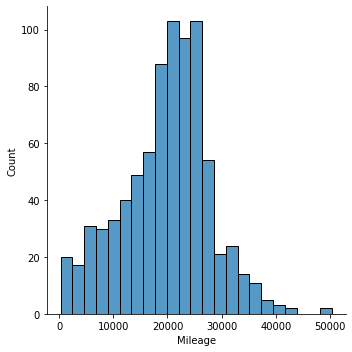

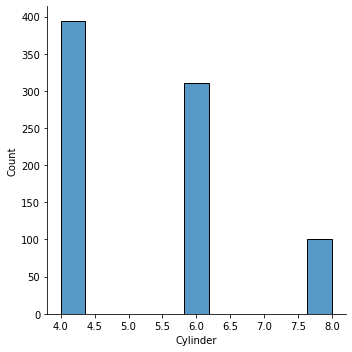

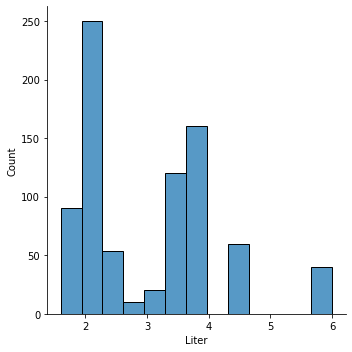

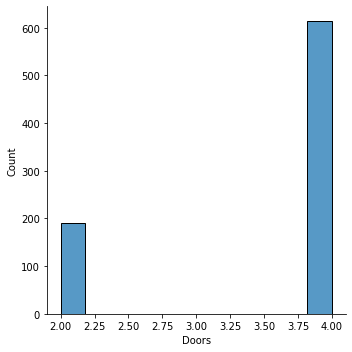

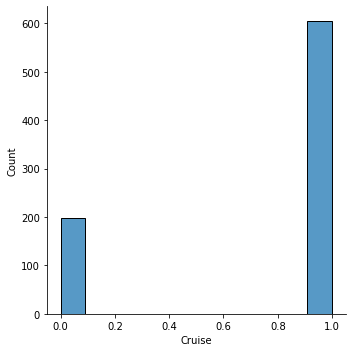

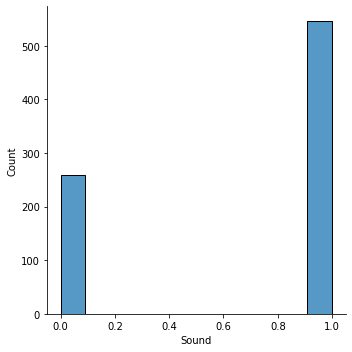

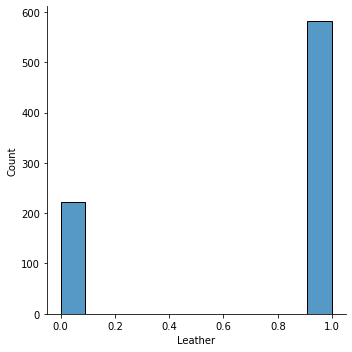

In [19]:
for i in cont_col:
  sns.displot(df,x=i)

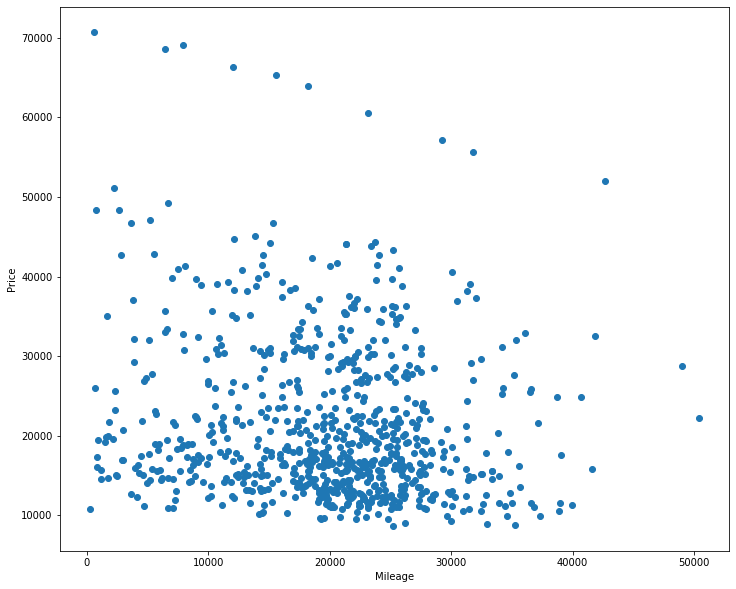

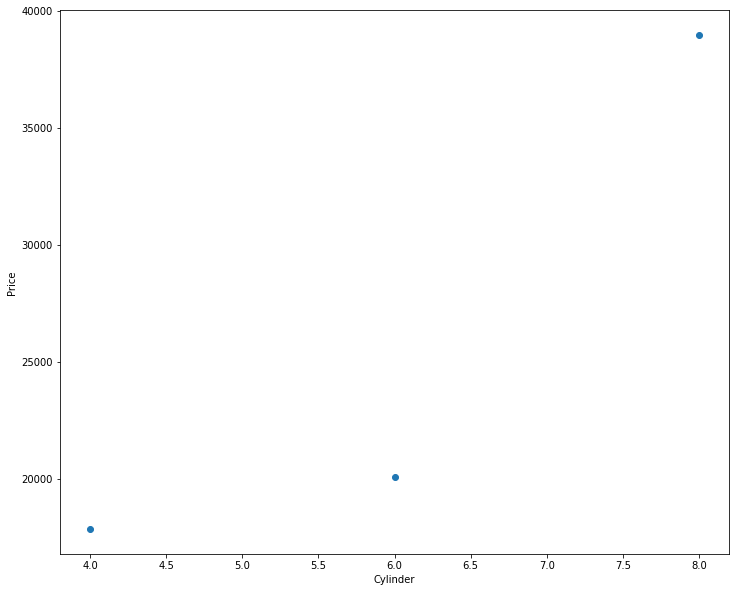

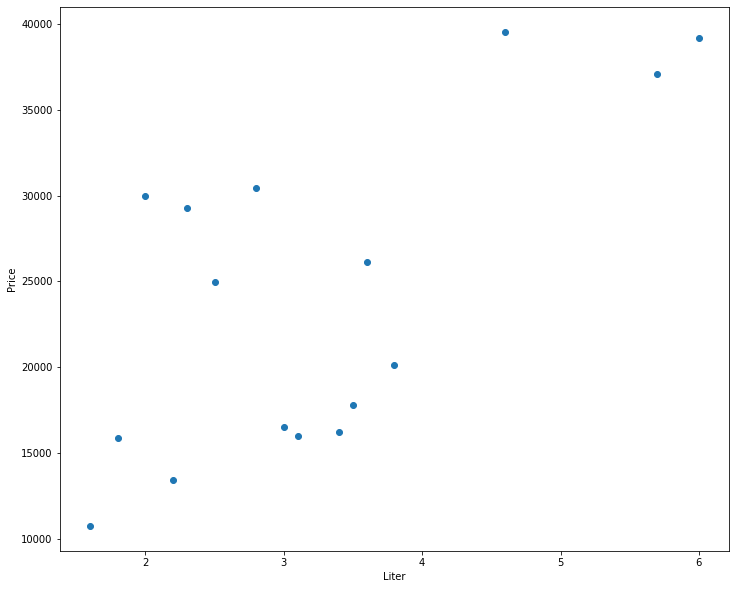

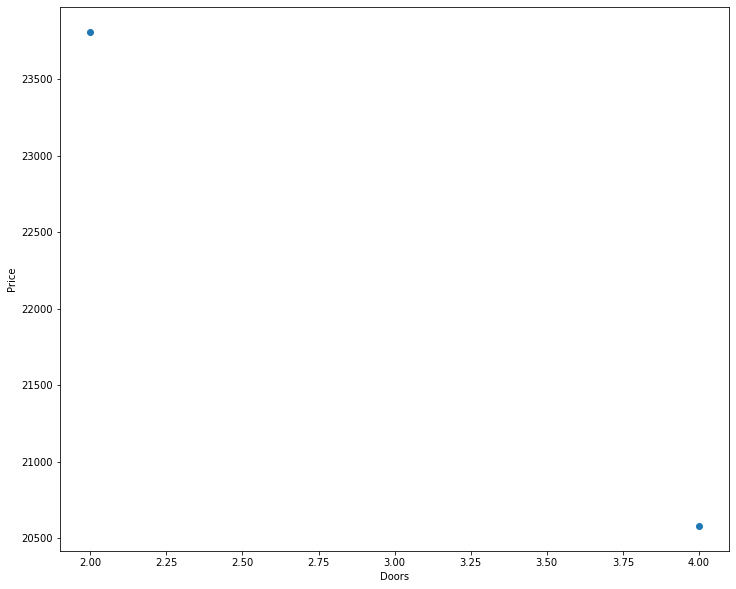

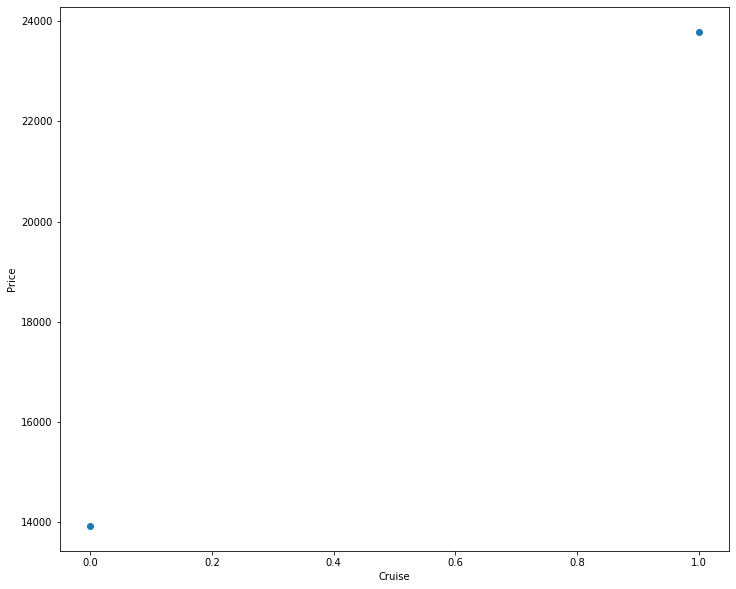

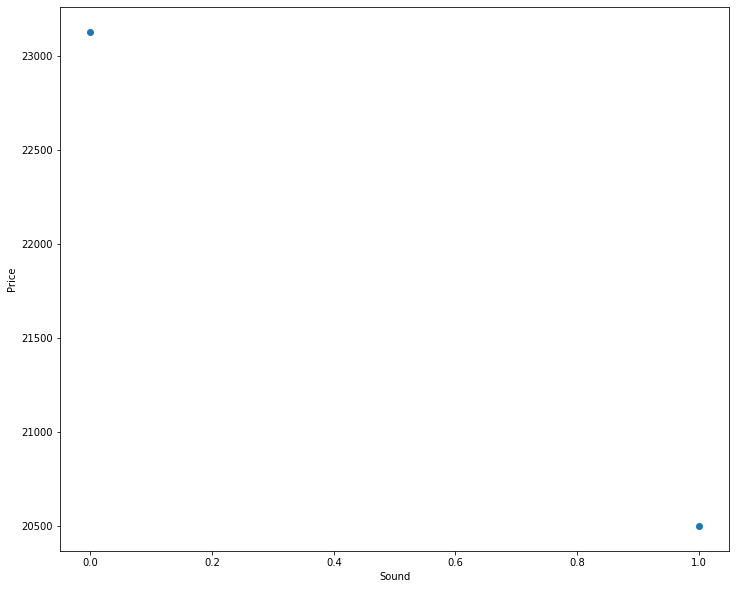

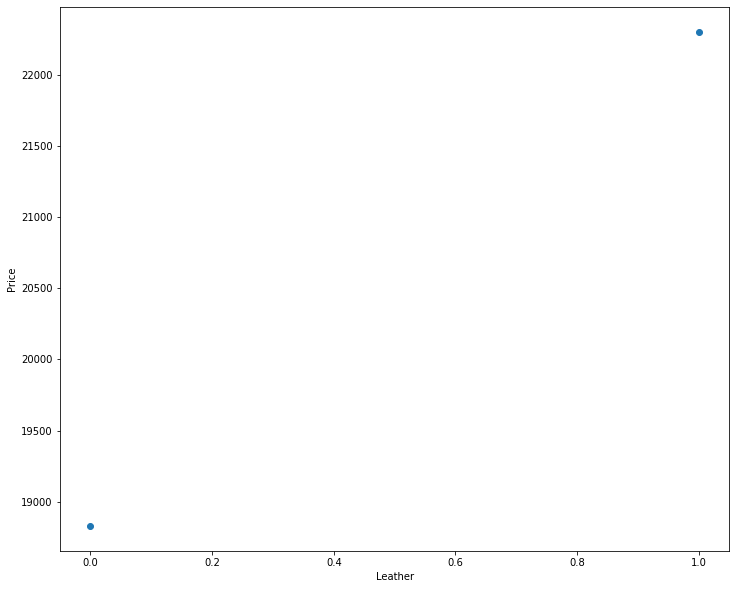

In [20]:
for i in cont_col:
  df.groupby(i)['Price'].mean().plot(style='o', figsize=(12,10))
  #df.plot(x=i,y='Price',style='o', figsize=(12,10))
  plt.xlabel(i)
  plt.ylabel('Price')
  plt.show()

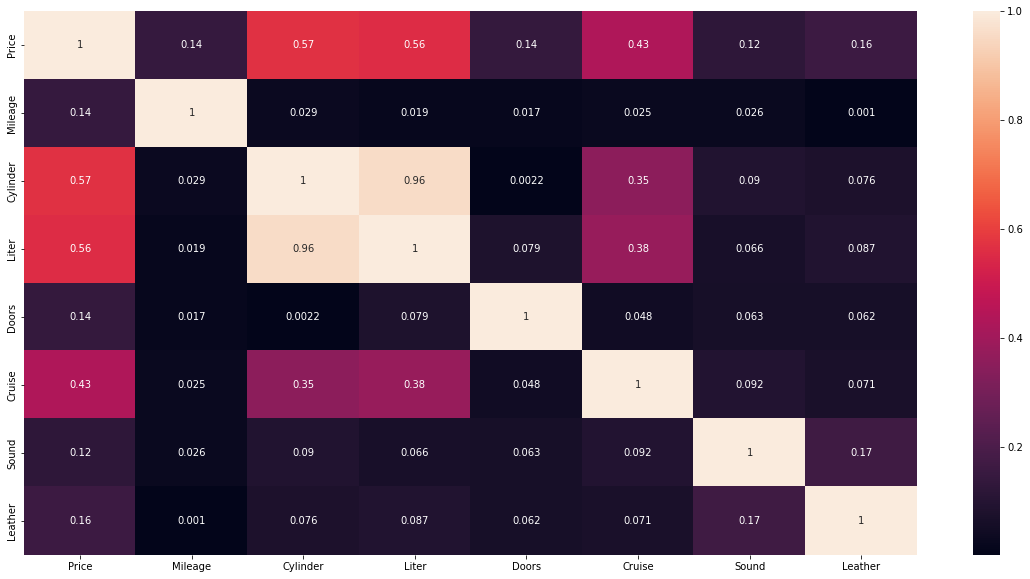

In [21]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(), annot=True)

In [22]:
for i in cont_col:
  print(df[[i,'Price']].corr())

          Mileage     Price
Mileage  1.000000 -0.143051
Price   -0.143051  1.000000
          Cylinder     Price
Cylinder  1.000000  0.569086
Price     0.569086  1.000000
          Liter     Price
Liter  1.000000  0.558146
Price  0.558146  1.000000
         Doors    Price
Doors  1.00000 -0.13875
Price -0.13875  1.00000
          Cruise     Price
Cruise  1.000000  0.430851
Price   0.430851  1.000000
          Sound     Price
Sound  1.000000 -0.124348
Price -0.124348  1.000000
          Leather     Price
Leather  1.000000  0.157197
Price    0.157197  1.000000


# ***find the linear regerssion for mileage and Price***

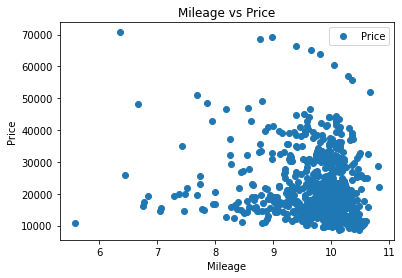

In [23]:
df['transformed'] = np.log(df['Mileage']) # transformation
df.plot(x='transformed', y='Price', style='o')
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [24]:
df[['transformed','Price']].corr()

,transformed,Price
transformed,1.000000,-0.145424
Price,-0.145424,1.000000


# ***All transformed column is not give linear relation to target variable***

#***3)encoding***

#***encoding is not needed for this data because this data not contains any catagorical datas.***

# ***4) splitting the data for train and test***

In [25]:
from sklearn.model_selection import train_test_split # import necessasary package

In [26]:
X=df.loc[:,['Mileage']]
y=df.loc[:,'Price']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1977)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

     Mileage
88     25199
321     9882
640     3907
294    22382
117    26250
..       ...
707    25380
429    28239
476    25020
791    32619
179    37345

[643 rows x 1 columns]
     Mileage
246    25069
190     7278
684    14568
13     19800
460     7065
..       ...
723    22021
343    14546
639    35157
571     2189
657    27558

[161 rows x 1 columns]
88     43374.052420
321    16428.578981
640    29246.237335
294    12845.174249
117    36245.158228
           ...     
707    28678.075251
429    16295.211438
476    21525.339008
791    11413.530403
179     9954.054174
Name: Price, Length: 643, dtype: float64
246    12383.402811
190    11918.456068
684    30122.429735
13     19924.159052
460    21745.029441
           ...     
723    28204.603578
343    42773.028390
639    27666.231078
571    19567.259291
657    30251.018417
Name: Price, Length: 161, dtype: float64


# ***5)scaling the data***

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler=StandardScaler()
#X_train=X_train.reshape(-1,1)
#X_test=X_test.reshape(-1,1)

In [30]:
scaler.fit(X_train) # scaling is not mandatory for linear regression
X_train_scale=scaler.transform(X_train)
X_test_scale=scaler.transform(X_test)

# ***2nd jar is task***

**this is supervised learning problem because we predict the target variable**

**feature is continous data so it is regression problem**

# ***3rd jar - model (linear regression***


# ***4th jar - loss function***
# ***5th jar - learning***


---





In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
reg=LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [33]:
coeff_df=reg.coef_  # best value of m
coeff_df

array([-0.18252667])

In [34]:
reg.intercept_ # best value of c

24819.26165800223

In [35]:
y_predict=reg.predict(X_test)
y_predict

array([20243.50052742, 23490.83254203, 22160.213106  , 21205.23356013,
       23529.71072308, 19802.69861549, 24502.21282942, 23318.7098907 ,
       18633.06770381, 18309.99549506, 20248.7938009 , 20652.90785184,
       22553.74060999, 19583.84913623, 19344.92172309, 24293.76737044,
       19929.73717893, 20840.72779693, 20202.24949964, 22879.91577215,
       21483.221681  , 19811.09484238, 22120.05723824, 21266.01494178,
       20862.99605087, 20809.88078943, 18578.492229  , 22179.74345986,
       20211.01077988, 20013.69944787, 19466.66701305, 20484.61826062,
       20584.64287666, 21706.63432705, 21596.57074406, 17027.01552032,
       21333.91486362, 21063.77538964, 19074.96477578, 23880.34445924,
       23936.5626741 , 20445.37502622, 19930.10223227, 21195.55964654,
       21016.13592835, 20726.4661005 , 22619.45021176, 20919.21426572,
       21075.27456995, 21199.39270664, 23863.00442544, 20389.33933804,
       20119.92997074, 19638.24208437, 21891.35131871, 23614.95067872,
      

# ***6th jar - evalute the model***

In [36]:
from sklearn import metrics
print("R2 score is :",metrics.r2_score(y_test,y_predict))

R2 score is : 0.005727582991958968


In [37]:
reg.score(X_test,y_test)

0.005727582991958968

Text(0.5, 1.0, 'Mileage vs Price')

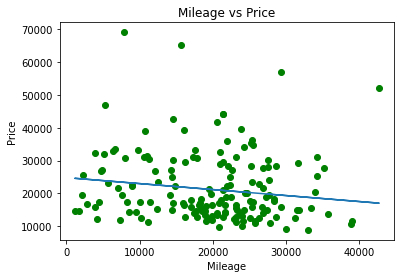

In [38]:
plt.scatter(X_test, y_test, color='g')
plt.plot(X_test,y_predict)
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Mileage vs Price')

# ***Part 2***

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.


# ***Now we take each 2 column get best R2 value

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 804 entries, 0 to 803
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price        804 non-null    float64
 1   Mileage      804 non-null    int64  
 2   Make         804 non-null    object 
 3   Model        804 non-null    object 
 4   Trim         804 non-null    object 
 5   Type         804 non-null    object 
 6   Cylinder     804 non-null    int64  
 7   Liter        804 non-null    float64
 8   Doors        804 non-null    int64  
 9   Cruise       804 non-null    int64  
 10  Sound        804 non-null    int64  
 11  Leather      804 non-null    int64  
 12  transformed  804 non-null    float64
dtypes: float64(3), int64(6), object(4)
memory usage: 120.2+ KB


In [40]:
X=df.loc[:,['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather']]
y=df.loc[:,'Price']

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=107)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

     Mileage  Cylinder  Liter  Doors  Cruise  Sound  Leather
378    31202         6    3.8      4       1      1        1
787    28298         4    2.2      4       0      1        0
704    22105         4    2.3      4       1      0        1
437    21452         6    3.5      4       0      1        1
797    10986         6    3.0      4       1      0        0
..       ...       ...    ...    ...     ...    ...      ...
654    22479         4    2.0      2       1      0        0
454    15898         6    3.8      2       1      0        0
473    22626         6    3.8      2       1      1        0
176    19945         4    1.6      4       0      0        0
62     18910         6    3.8      4       1      0        1

[562 rows x 7 columns]
     Mileage  Cylinder  Liter  Doors  Cruise  Sound  Leather
27     22596         6    3.6      4       1      0        0
728    24738         4    2.3      4       1      1        1
736    21822         4    2.3      4       1      1        1


In [42]:
scaler=StandardScaler()

In [43]:
scaler.fit(X_train) # scaling is not mandatory for linear regression
X_train_scale=scaler.transform(X_train)
X_test_scale=scaler.transform(X_test)

In [44]:
reg=LinearRegression()
reg.fit(X_train_scale,y_train)

LinearRegression()

In [45]:
y_predict=reg.predict(X_test_scale)

In [46]:
print("R2 score is :",metrics.r2_score(y_test,y_predict))

R2 score is : 0.4684217763521955


In [47]:
reg.score(X_test_scale,y_test)

0.4684217763521955

In [48]:
coef = pd.DataFrame(reg.coef_, ['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather'] , columns = ['coefficient'])
coef

,coefficient
Mileage,-1305.173073
Cylinder,5781.724010
Liter,-1488.407082
Doors,-1415.451492
Cruise,2749.363886
Sound,-907.714109
Leather,1601.630903


In [49]:
import itertools

In [50]:
combinations=[]
R2_score=[]
for i in range(len(X)+1):
  for j in itertools.combinations(X,i):
    combinations.append(j)

In [51]:
combinations

[(),
 ('Mileage',),
 ('Cylinder',),
 ('Liter',),
 ('Doors',),
 ('Cruise',),
 ('Sound',),
 ('Leather',),
 ('Mileage', 'Cylinder'),
 ('Mileage', 'Liter'),
 ('Mileage', 'Doors'),
 ('Mileage', 'Cruise'),
 ('Mileage', 'Sound'),
 ('Mileage', 'Leather'),
 ('Cylinder', 'Liter'),
 ('Cylinder', 'Doors'),
 ('Cylinder', 'Cruise'),
 ('Cylinder', 'Sound'),
 ('Cylinder', 'Leather'),
 ('Liter', 'Doors'),
 ('Liter', 'Cruise'),
 ('Liter', 'Sound'),
 ('Liter', 'Leather'),
 ('Doors', 'Cruise'),
 ('Doors', 'Sound'),
 ('Doors', 'Leather'),
 ('Cruise', 'Sound'),
 ('Cruise', 'Leather'),
 ('Sound', 'Leather'),
 ('Mileage', 'Cylinder', 'Liter'),
 ('Mileage', 'Cylinder', 'Doors'),
 ('Mileage', 'Cylinder', 'Cruise'),
 ('Mileage', 'Cylinder', 'Sound'),
 ('Mileage', 'Cylinder', 'Leather'),
 ('Mileage', 'Liter', 'Doors'),
 ('Mileage', 'Liter', 'Cruise'),
 ('Mileage', 'Liter', 'Sound'),
 ('Mileage', 'Liter', 'Leather'),
 ('Mileage', 'Doors', 'Cruise'),
 ('Mileage', 'Doors', 'Sound'),
 ('Mileage', 'Doors', 'Leather'),

In [52]:
for i in range(1,len(combinations)):
  X_comp=df.loc[:,combinations[i]]
  y_comp=df.loc[:,'Price']
  X_train,X_test,y_train,y_test=train_test_split(X_comp,y_comp,test_size=0.3,random_state=107)
  scaler.fit(X_train)
  X_train_scale=scaler.transform(X_train)
  X_test_scale=scaler.transform(X_test)
  reg=LinearRegression()
  reg.fit(X_train_scale,y_train)
  y_predict=reg.predict(X_test_scale)
  R2_score.append(metrics.r2_score(y_test,y_predict))
  print("R2 score", i-1 ,combinations[i],"is :",metrics.r2_score(y_test,y_predict))


R2 score 0 ('Mileage',) is : 0.035796562920820674
R2 score 1 ('Cylinder',) is : 0.3542184512860992
R2 score 2 ('Liter',) is : 0.3588001215950437
R2 score 3 ('Doors',) is : 0.025041551723885225
R2 score 4 ('Cruise',) is : 0.19660399809877727
R2 score 5 ('Sound',) is : 0.020740068395317945
R2 score 6 ('Leather',) is : 0.02423902174135173
R2 score 7 ('Mileage', 'Cylinder') is : 0.3800668219137213
R2 score 8 ('Mileage', 'Liter') is : 0.38789472142854253
R2 score 9 ('Mileage', 'Doors') is : 0.06330583477924356
R2 score 10 ('Mileage', 'Cruise') is : 0.23667620535025546
R2 score 11 ('Mileage', 'Sound') is : 0.05953182051468253
R2 score 12 ('Mileage', 'Leather') is : 0.061143238668187716
R2 score 13 ('Cylinder', 'Liter') is : 0.3576984158225376
R2 score 14 ('Cylinder', 'Doors') is : 0.37380253027995114
R2 score 15 ('Cylinder', 'Cruise') is : 0.4128318078604811
R2 score 16 ('Cylinder', 'Sound') is : 0.3576781014467386
R2 score 17 ('Cylinder', 'Leather') is : 0.3653996623001412
R2 score 18 ('Lit

In [53]:
for i in range(0,len(R2_score)):
  if R2_score[i]==max(R2_score):
    print("intex of max(R2_score) is ",i)
    print("combinations of best features is", combinations[i+1])
    break

intex of max(R2_score) is  123
combinations of best features is ('Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather')


# ***best combination of features is 'Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather' and R2_score of these combination is 0.4712***

# ***Tasks, Hard Mode***

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 804 entries, 0 to 803
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price        804 non-null    float64
 1   Mileage      804 non-null    int64  
 2   Make         804 non-null    object 
 3   Model        804 non-null    object 
 4   Trim         804 non-null    object 
 5   Type         804 non-null    object 
 6   Cylinder     804 non-null    int64  
 7   Liter        804 non-null    float64
 8   Doors        804 non-null    int64  
 9   Cruise       804 non-null    int64  
 10  Sound        804 non-null    int64  
 11  Leather      804 non-null    int64  
 12  transformed  804 non-null    float64
dtypes: float64(3), int64(6), object(4)
memory usage: 120.2+ KB


In [95]:
from sklearn.preprocessing import OrdinalEncoder
encode=OrdinalEncoder()
df_make=df.Make.unique()
df_make


array(['Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn'],
      dtype=object)

In [61]:
df_model=df.Model.unique()
df_model

array(['Century', 'Lacrosse', 'Lesabre', 'Park Avenue', 'CST-V', 'CTS',
       'Deville', 'STS-V6', 'STS-V8', 'XLR-V8', 'AVEO', 'Cavalier',
       'Classic', 'Cobalt', 'Corvette', 'Impala', 'Malibu', 'Monte Carlo',
       'Bonneville', 'G6', 'Grand Am', 'Grand Prix', 'GTO', 'Sunfire',
       'Vibe', '9_3', '9_3 HO', '9_5', '9_5 HO', '9-2X AWD', 'Ion',
       'L Series'], dtype=object)

In [66]:
df_type=df.Type.unique()
df_type

array(['Sedan', 'Convertible', 'Hatchback', 'Coupe', 'Wagon'],
      dtype=object)

In [103]:
df_cata=df.loc[:,['Make','Model','Type']]
df_new=pd.get_dummies(data=df_cata,columns=['Make','Model','Type'])
df_new

,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Model_9-2X AWD,Model_9_3,Model_9_3 HO,Model_9_5,...,Model_STS-V6,Model_STS-V8,Model_Sunfire,Model_Vibe,Model_XLR-V8,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
800,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
801,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
802,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [98]:
comp=[]
for i in df_make:
  comp.append(i)

In [99]:
comp

['Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn']

In [104]:
X_all=df_new.loc[:,list(df_new.columns)]
y=df.loc[:,'Price']


In [105]:
X_all

,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Model_9-2X AWD,Model_9_3,Model_9_3 HO,Model_9_5,...,Model_STS-V6,Model_STS-V8,Model_Sunfire,Model_Vibe,Model_XLR-V8,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
800,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
801,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
802,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [106]:
X_train,X_test,y_train,y_test=train_test_split(X_all,y,test_size=0.3,random_state=107)
scaler.fit(X_train)
X_train_scale=scaler.transform(X_train)
X_test_scale=scaler.transform(X_test)
reg=LinearRegression()
reg.fit(X_train_scale,y_train)
y_predict=reg.predict(X_test_scale)
R2_score.append(metrics.r2_score(y_test,y_predict))
print("R2 score is :",metrics.r2_score(y_test,y_predict))

R2 score is : 0.9548108384186119


In [115]:
coef = pd.DataFrame(reg.coef_, list(df_new.columns) , columns = ['coefficient'])
coef

,coefficient
Make_Buick,5.810488e+15
Make_Cadillac,8.475841e+16
Make_Chevrolet,1.060946e+17
Make_Pontiac,-5.009008e+15
Make_SAAB,7.579094e+16
Make_Saturn,4.307843e+16
Model_9-2X AWD,6.323281e+15
Model_9_3,1.202121e+16
Model_9_3 HO,2.040144e+16
Model_9_5,1.645827e+16


# Make_Chevrolet is most important make give high coeffient.

# Model_Bonneville is most important model give high coeffient.

# Type_Sedan is most important type give high coefficient
